In [995]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)

In [996]:
data_frame=pd.read_csv(".//data//Bengaluru_House_Data.csv")
data_frame.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [997]:
data_frame.shape

(13320, 9)

In [998]:
#Grouping data based on area

data_frame.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [999]:
data_frame.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [1000]:
data_frame2 = data_frame.drop(['area_type','society','balcony','availability'],axis='columns')
data_frame2.shape

(13320, 5)

In [1001]:
#Data cleaning
"""
In data cleaning most basic part is to handle null value. So first of all we will find
null values in all the columns and then we will replace it with some numeric data(like we
can taken median of all value and fill it with them) or we can drop them as well and for
non-numeric data either we can drop them or we can fill thwm with most common data which is
avilable in that column i.e. 
"""
#fetching all the null values in each columns
data_frame2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [1002]:
data_frame3 = data_frame2.dropna()
data_frame3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [1003]:
data_frame3['size'].unique() 
"""
If we see carefully in our data few of the values are same but they are written in 2 
different ways i.e. 6BHK and 6 Bedroom.
So we will solve this first.
"""

'\nIf we see carefully in our data few of the values are same but they are written in 2 \ndifferent ways i.e. 6BHK and 6 Bedroom.\nSo we will solve this first.\n'

In [1004]:
"""
Now we will divide the size column in 2 section first will contain numeric value and 
second will non-numeric. i.e 4 BHK can be split into 4 and BHK.
Then we will store this values in new column.
"""
data_frame3 = data_frame3.copy()  # Ensure it's a copy, not a view
data_frame3['bhk'] = data_frame3['size'].apply(lambda x: int(x.split(' ')[0]))
data_frame3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [1005]:
data_frame.head()
"""
Now every value for bhk is same so we can drop our size column
"""

'\nNow every value for bhk is same so we can drop our size column\n'

In [1006]:
data_frame3 = data_frame3.drop(columns=['size'])


In [1007]:
data_frame3.head()
"""
Now the size column has been removed and we have store it's value in bhk column now we 
have clean data
"""

"\nNow the size column has been removed and we have store it's value in bhk column now we \nhave clean data\n"

In [1008]:
#Doing some operation on our data
data_frame3[data_frame3.bhk>20]

"""
If we notice carefully in our total_sqft column data is not that accurate
for row-4684 if we see carefully it is written we have 34 bhk in just 2400 sq.ft data 
which definetly not correct 
"""

'\nIf we notice carefully in our total_sqft column data is not that accurate\nfor row-4684 if we see carefully it is written we have 34 bhk in just 2400 sq.ft data \nwhich definetly not correct \n'

In [1009]:
data_frame3['total_sqft'].unique()
"""
if we notice few of our data are in range which is not correct so first of all we will try
to improve this by converting range into 1 fixed value i.e we have a range 1133 - 1384
we will take median of both the values and store it only. 
"""

'\nif we notice few of our data are in range which is not correct so first of all we will try\nto improve this by converting range into 1 fixed value i.e we have a range 1133 - 1384\nwe will take median of both the values and store it only. \n'

In [1010]:
def convert_sq_to_num(x):
    try:
        if '-' in x:
            tokens = x.split('-')
            return (float(tokens[0].strip()) + float(tokens[1].strip())) / 2
        return float(x.strip())
    except:
        return None#for values like 34.46Sq. Meter
    
data_frame3['total_sqft']=data_frame3['total_sqft'].apply(convert_sq_to_num)
data_frame3 = data_frame3[data_frame3.total_sqft.notnull()]
data_frame3['total_sqft'].head()

0    1056.0
1    2600.0
2    1440.0
3    1521.0
4    1200.0
Name: total_sqft, dtype: float64

In [1011]:
data_frame3.loc[30]

location      Yelahanka
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [1012]:
data_frame3.columns

Index(['location', 'total_sqft', 'bath', 'price', 'bhk'], dtype='object')

In [1013]:
#Callculting the price per_sqft and conveting the value into lakhs
data_frame3['price_per_sqft']=data_frame3['price']*100000/data_frame3['total_sqft']
data_frame3.head(5)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


In [1014]:
#As we have price per_sqft  so we can drop the price columns


In [1015]:
data_frame.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [1016]:
len(data_frame3.location.unique())

1298

In [1017]:
data_frame3['location'].head()

0    Electronic City Phase II
1            Chikka Tirupathi
2                 Uttarahalli
3          Lingadheeranahalli
4                    Kothanur
Name: location, dtype: object

In [1018]:
"""few of values in location column has leading or ending unnessary spaces so we will remove
it first"""

data_frame3.location=data_frame3.location.apply(lambda x:x.strip())

location_stats=data_frame3.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               533
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           264
Thanisandra              235
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kannur                     1
whitefiled                 1
Name: location, Length: 1287, dtype: int64

In [1019]:
"""
If we noticr in our location data only few of the years are repating repeatedly so the 
location with count less than 10 can be categorized as other_location
"""
len(location_stats[location_stats>10])

240

In [1020]:
location_stats_less_than_10=location_stats[location_stats<=10]
location_stats_less_than_10

location
Sadashiva Nagar          10
Naganathapura            10
Basapura                 10
Nagadevanahalli          10
Kalkere                  10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kannur                    1
whitefiled                1
Name: location, Length: 1047, dtype: int64

In [1021]:
data_frame3.location = data_frame3['location'].apply(lambda x: 'other' if x in location_stats_less_than_10 else x)
len(data_frame3.location.unique())

241

In [1022]:
data_frame3.head(15)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


In [1023]:
#detecting outlier and removing them
"""
what is outlier ? and why to remove it
-->Outlier in a data points toward a value which is very different from other values
i.e we have list_ages=[18,19,20,17.18.100] here every values is in range of 17-20
but 100 is way higher so it is a outlier which either represent as typo mistake or
incorrect measurement that's we remove it to inc the accuracy.
"""
"""
In our data we notice 6 bhk flat are avilable in 1000 sqft which is techinally not possible
they are kind of outlier which we need to remove
"""
data_frame4=data_frame3[~(data_frame3.total_sqft/data_frame3.bhk<300)]
data_frame4.shape
 

(12456, 6)

In [1024]:
#now we will check whether the price is correct or not
data_frame4.price_per_sqft.describe()
"""
If we see carefully the min price for a property per_sqft is 267Rs which is not possible 
and there are many more like that.
And for max price_per_sqft is 176470 which is way to high
"""

'\nIf we see carefully the min price for a property per_sqft is 267Rs which is not possible \nand there are many more like that.\nAnd for max price_per_sqft is 176470 which is way to high\n'

In [1025]:
  def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price)
        st = np.std(subdf.price)
        reduced_df = subdf[(subdf.price>(m-st)) & (subdf.price<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
data_frame5=remove_pps_outliers(data_frame4)
data_frame5.shape

(10683, 6)

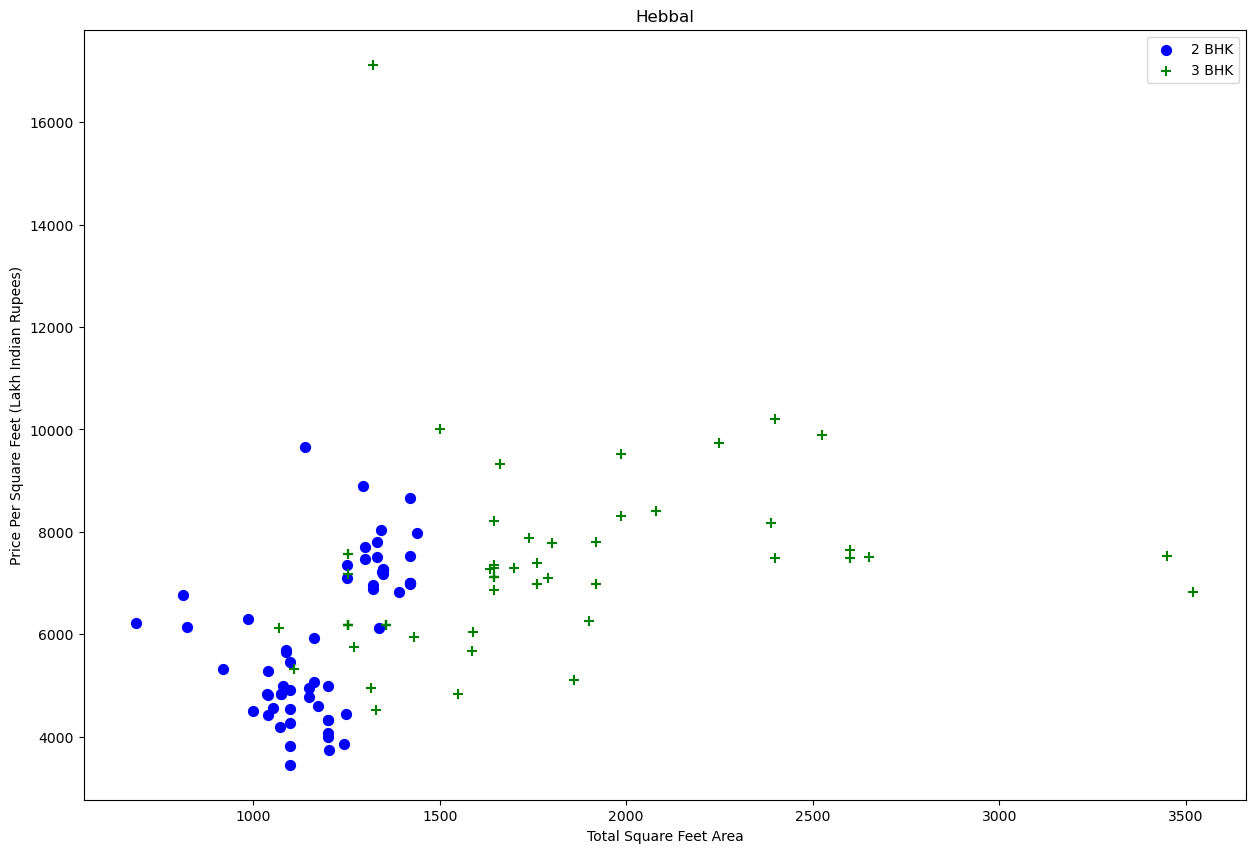

'\nIf we see carefully at some places price for 2BHK is more than 3BHK\n'

In [1026]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price_per_sqft,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price_per_sqft,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price Per Square Feet (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    plt.show()
    
plot_scatter_chart(data_frame5,"Hebbal")

"""
If we see carefully at some places price for 2BHK is more than 3BHK
"""

In [1027]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
data_frame6 = remove_bhk_outliers(data_frame5)
data_frame6.shape

(7321, 6)

In [1028]:
"""We should also remove properties where for same location, the price of 3 bedroom apartment is less than 2 bedroom apartment 
(with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.

{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}
Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment"""


"We should also remove properties where for same location, the price of 3 bedroom apartment is less than 2 bedroom apartment \n(with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.\n\n{\n    '1' : {\n        'mean': 4000,\n        'std: 2000,\n        'count': 34\n    },\n    '2' : {\n        'mean': 4300,\n        'std: 2300,\n        'count': 22\n    },    \n}\nNow we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment"

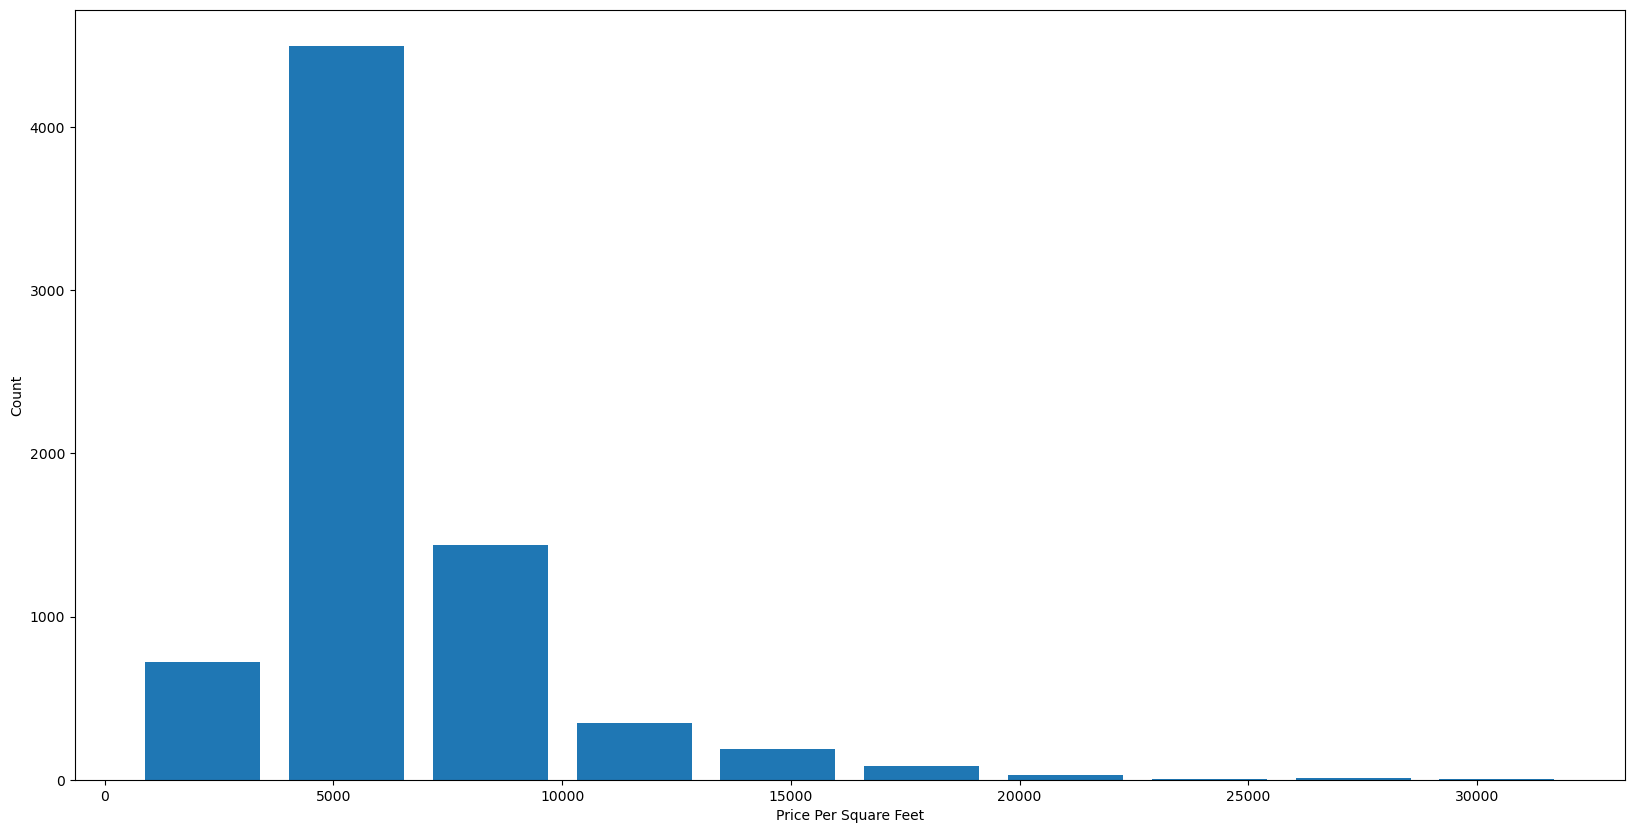

In [1029]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(data_frame6.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
plt.show()

In [1030]:
data_frame6.bath.unique()

array([ 3.,  2.,  4.,  5.,  8.,  1.,  6.,  7., 12., 10.,  9., 13.])

In [1031]:
data_frame6[data_frame6.bath>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5475,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
9722,other,6000.0,12.0,150.0,11,2500.000000
10061,other,5425.0,13.0,275.0,13,5069.124424


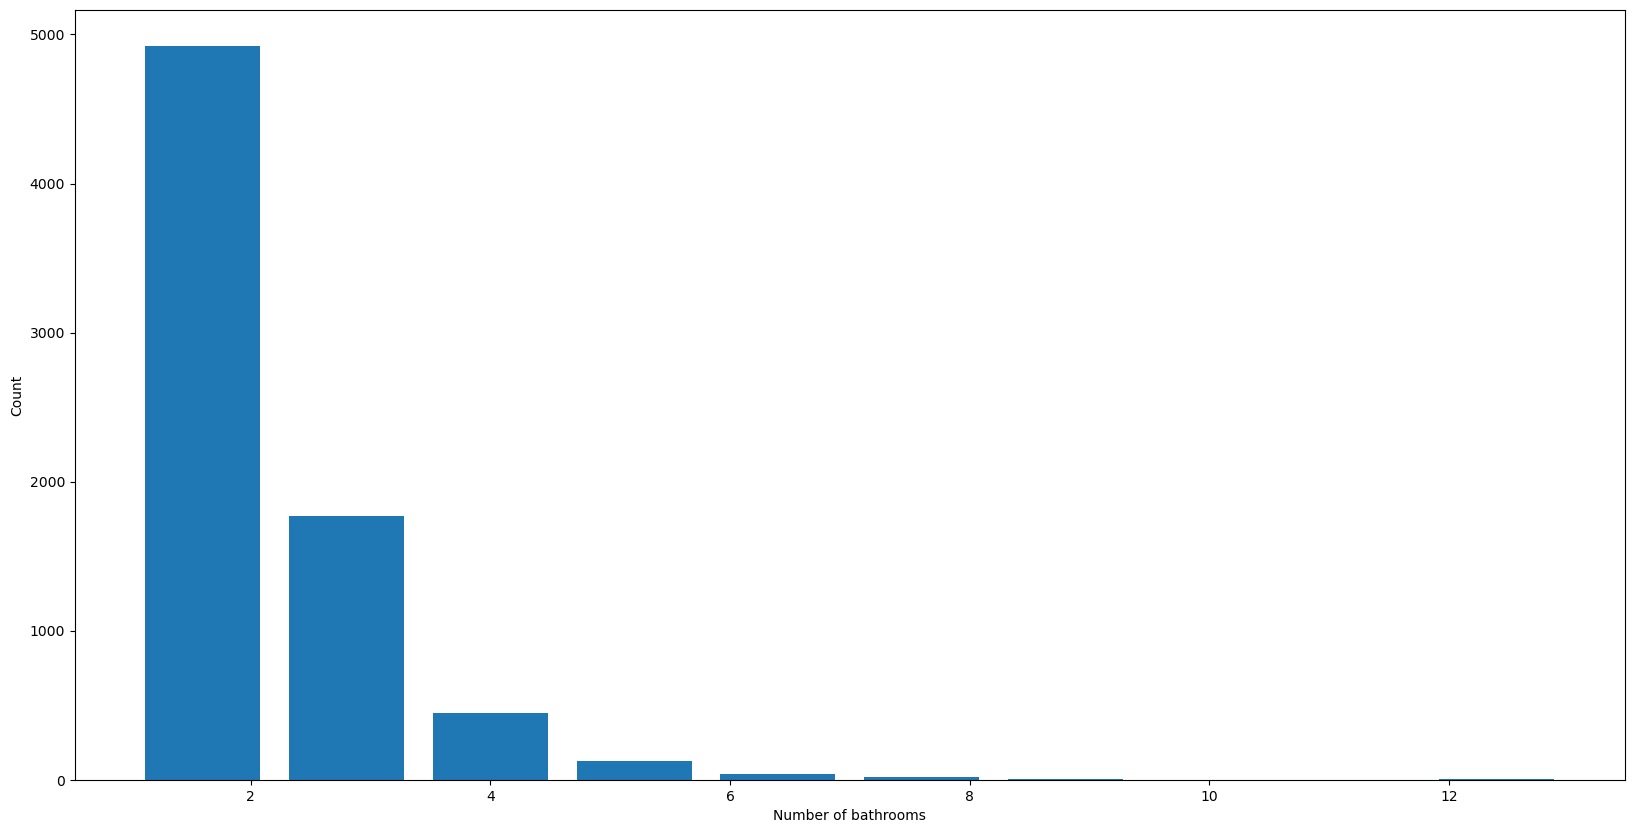

In [1032]:
plt.hist(data_frame6.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")
plt.show()

In [1033]:
data_frame6

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
1,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
2,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
3,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668
4,1st Block Jayanagar,1760.0,3.0,115.0,3,6534.090909
...,...,...,...,...,...,...
10674,other,2000.0,2.0,360.0,3,18000.000000
10675,other,1140.0,1.0,185.0,2,16228.070175
10678,other,1353.0,2.0,110.0,2,8130.081301
10679,other,812.0,1.0,26.0,1,3201.970443


In [1034]:
data_frame7 = data_frame6[data_frame6.bath <= data_frame6.bhk + 2]
data_frame7.shape

(7319, 6)

In [1035]:
data_frame8=data_frame7.drop(columns=['bath'])
data_frame8

,location,total_sqft,price,bhk,price_per_sqft
0,1st Block Jayanagar,1630.0,194.0,3,11901.840491
1,1st Block Jayanagar,1875.0,235.0,3,12533.333333
2,1st Block Jayanagar,1200.0,130.0,3,10833.333333
3,1st Block Jayanagar,1235.0,148.0,2,11983.805668
4,1st Block Jayanagar,1760.0,115.0,3,6534.090909
...,...,...,...,...,...
10674,other,2000.0,360.0,3,18000.000000
10675,other,1140.0,185.0,2,16228.070175
10678,other,1353.0,110.0,2,8130.081301
10679,other,812.0,26.0,1,3201.970443


In [1036]:
#If we see there are few columns whose data are in text and as we now we can't work on textual
#data so we do encoding first

dummies=pd.get_dummies(data_frame8.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10674,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10675,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10678,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10679,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [1037]:
# Dropping the "other" column because its values can be inferred from the remaining columns
data_frame9 = pd.concat([data_frame8, dummies.drop('other', axis='columns')], axis='columns')
data_frame9.head(3)

,location,total_sqft,price,bhk,price_per_sqft,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,1630.0,194.0,3,11901.840491,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1875.0,235.0,3,12533.333333,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1200.0,130.0,3,10833.333333,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [1038]:
#As we already have divided the location into dummies columns so we can drop that now
data_frame10=data_frame9.drop(columns=['location'])

In [1039]:
data_frame10.columns

Index(['total_sqft', 'price', 'bhk', 'price_per_sqft', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [1040]:
# Now we will start training our model 
X=data_frame10.drop('price_per_sqft',axis='columns')
X.head(5)

,total_sqft,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1630.0,194.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1875.0,235.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,130.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1235.0,148.0,2,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1760.0,115.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [1041]:
y=data_frame10.price_per_sqft
len(y)

7319

In [1042]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [1043]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.8432818806410552

In [1044]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)


array([0.81060108, 0.82910837, 0.83876254, 0.85357875, 0.81268581])